### *PhotoDissociation Region Toolbox Notebooks*
-------------------------------------------------------------

# Example 3: Determining Radiation Field and Density

This example shows use the PDRT Toolbox to determine the PDR radiation field $G_0$ and $H_2$ volume density $n$ from your spectral line and far-infrared (FIR) data into the PDR Toolbox.  The case is for single-pixel observations (as in the classic PDRT website).   If you have not gone through the Measurements and ModelSets examples, you should do them first.


### 3a. Determining Radiation Field and Density from single value Measurements
Following the example on how to use Measurements, create Measurements for your observations.

In [1]:
from pdrtpy.measurement import Measurement
from pdrtpy.modelset import ModelSet
import pdrtpy.pdrutils as utils
from pdrtpy.tool.lineratiofit import LineRatioFit
from pdrtpy.plot.lineratioplot import LineRatioPlot
from astropy.nddata import StdDevUncertainty
import astropy.units as u
import numpy as np

/home/mpound/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(), op)(other)


In [2]:
myunit = "erg s-1 cm-2 sr-1"
m1 = Measurement(data=30.,uncertainty = StdDevUncertainty(5.0),identifier="OI_145",unit=myunit)
m2 = Measurement(data=11.,uncertainty = StdDevUncertainty(2.5),identifier="CI_609",unit=myunit)
m3 = Measurement(data=1.3E9,uncertainty = StdDevUncertainty(2E8),identifier="CO_21",restfreq="230.538 GHz", unit="K km/s")
m4 = Measurement(data=100.,uncertainty = StdDevUncertainty(10.),identifier="CII_158",unit=myunit)
a = [m1,m2,m3,m4]

Now create the fitting tool, feeding it your observations.   It will use the default  Wolfire/Kauffman ModelSet.

In [3]:
p = LineRatioFit(measurements=a)

### Now run it! 
Note the K km s$^{-1}$ get converted on the fly to erg s$^{-1}$ cm$^{-2}$ sr$^{-1}$.  You will get warned that there are no beam parameters in the Measurements.

In [4]:
p.run()

/home/mpound/src/pdrtpy/pdrtpy/pdrutils.py:239: UserWarning: LineRatioFit: No beam parameters in Measurement headers, assuming they are all equal!
  warnings.warn(cls.__class__.__name__+": "+msg)


Converting K km/s to erg / (cm2 s sr) using Factor = +1.256E-08 g / (cm K s2)


### The results are stored in member variables as Measurements.
`pdrutils` has methods to convert between the common radiation field measures.

In [5]:
print("n=",p.density)
print("G0=",p.radiation_field)
# example conversions
print(utils.toDraine(p.radiation_field))
print(utils.tocgs(p.radiation_field))
print(utils.toMathis(p.radiation_field))

n= 316227.7660168379 +/- 0.058309518948453 1 / cm3
G0= 56.23413251903491 +/- 0.058309518948453 Habing
33.274634626647874 +/- 0.03450267393399586 Draine
0.08997461203045586 +/- 9.329523031752481e-05 erg / (cm2 s)
44.36617950219716 +/- 0.04600356524532781 Mathis


## Now on to plotting!
Create a plotter from the tool.  For single pixel measurements, you can plot the observed ratios in (G0,n) space like the classic PDRT.  

In [6]:
plot = LineRatioPlot(p)

In [7]:
# since you only have one pixel, asking to plot density, radiation field, or both just prints
plot.show_both()

(56.23413251903491 +/- 0.058309518948453 Habing,
 316227.7660168379 +/- 0.058309518948453 1 / cm3)

### LineRatioPlot has many options for how plots are displayed.
You can vary colormap, contours, units, etc.  For an exhaustive list, see the documentation web page or type `help(LineRatioPlot)`.
    

#### plot your observed ratios with errors on the matching models 

/home/mpound/src/pdrtpy/pdrtpy/plot/lineratioplot.py:574: UserWarning: The following kwargs were not used by contour: 'ncols', 'index', 'nrows'
  contourset = self._axis[axidx].contour(x,y,km.data, **kwargs_contour)


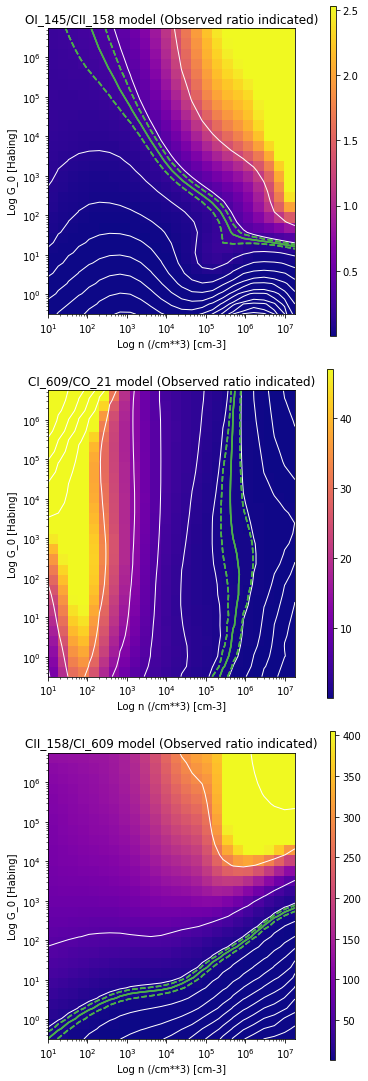

In [8]:
plot.ratios_on_models(ncols=1)

#### Plot the reduced chisquare in (n,G0) space, using an alternative colormap and label the contours

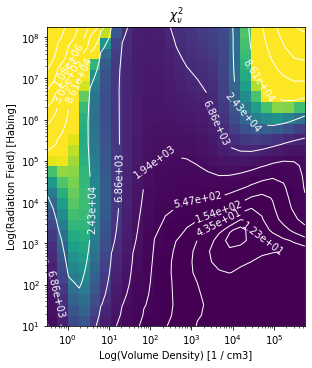

In [9]:
plot.reduced_chisq(cmap='viridis',label=True)

#### How about just contours? We need to specify color since default contour color is white

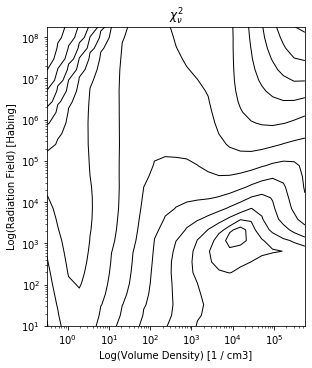

In [10]:
plot.reduced_chisq(image=False,colors='k')

#### Overlay all the ratios and errors in model space.

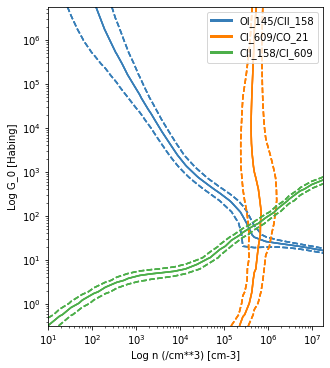

In [11]:
plot.overlay_all_ratios()

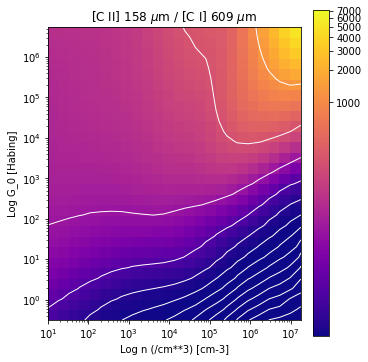

In [12]:
plot.modelratio("CII_158/CI_609")

In [13]:
p._modelratios["CII_158/CI_609"].wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'Log n (/cm**3)'  'Log G_0'  
CRVAL : 1.0  -0.5  
CRPIX : 1.0  1.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.25  0.25  
NAXIS : 25  29

In [14]:
plot.observedratio("CII_158/CI_609")

9.090909090909092 +/- 2.2572727741731673 